## Assignment 1: Plot of Data of My Choice

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#environmental variable
#create the env variable since previous doesn't work
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [38]:
def zips():
    print ("Downloading")
    if not os.path.isfile(os.getenv("PUIDATA") + "/NTA.zip"):
        print ("no zip in puidata")
        if not os.path.isfile("NTA.zip"):
            print ("no zip in current folder")
            urllib.request.urlretrieve('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile', "NTA.zip")                  

    os.system("mv NTA.zip " + os.getenv("PUIDATA"))
    print ("moving zipped file")
    
    ### unzip the csv 
    os.system("unzip "+ os.getenv("PUIDATA") + "/NTA.zip -d " + os.getenv("PUIDATA"))
    print ("unzipped file")

    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/NTA.zip"):
        print ("WARNING!!! something is wrong: the %s file is not there!" % (x))

    else:
        print ("file in place, you can continue")

In [39]:
zips()

Downloading
no zip in puidata
no zip in current folder
moving zipped file
unzipped file
file in place, you can continue


In [40]:
for file in (os.listdir(os.getenv("PUIDATA"))):
    path = (os.getenv("PUIDATA") + '/')
    if file.endswith("69.dbf"):
        os.rename(path + file, path + 'NTA' + '.dbf')
    if file.endswith("69.prj"):
        os.rename(path + file, path + 'NTA' + '.prj')
    if file.endswith("69.shp"):
        os.rename(path + file, path + 'NTA' + '.shp')
    if file.endswith("69.shx"):
        os.rename(path + file, path + 'NTA' + '.shx')

In [41]:
gdf = gpd.GeoDataFrame.from_file((os.getenv("PUIDATA") + '/NTA.shp'))


In [42]:
gdf.crs = from_epsg(2263)

In [43]:
gdf.crs

{'init': 'epsg:2263', 'no_defs': True}

Text(0.5,1,'NYC Neighborhood Tabulation Areas')

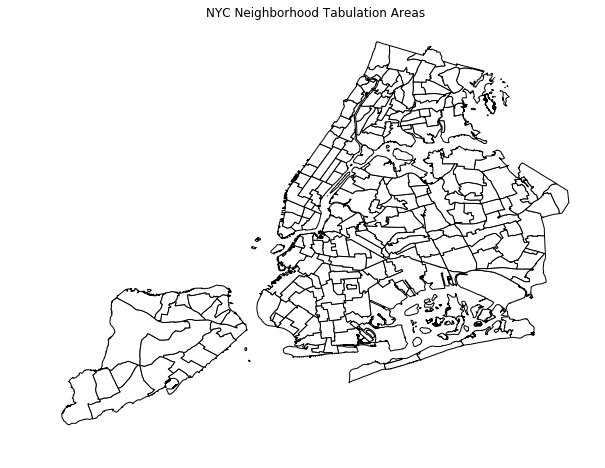

In [44]:
gdf.plot(color="white", edgecolor="black", figsize=(10,10)).axis('off')
pl.title('NYC Neighborhood Tabulation Areas')

In [45]:
gdf.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904861,POLYGON ((-73.80379022888246 40.77561011179248...
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712318,"POLYGON ((-73.86109724335759 40.7636644770869,..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,POLYGON ((-73.75725671509139 40.71813860166257...
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...


In [46]:
gdf['ntacode'].nunique()

195

In [93]:
pupsdf = pd.read_csv('https://data.cityofnewyork.us/api/views/nu7n-tubp/rows.csv?accessType=DOWNLOAD')

In [94]:
pupsdf.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate
0,1753,SHADOW,M,01/01/2000 12:00:00 AM,Beagle,Brooklyn,11236.0,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016
1,2415,ROCCO,M,10/01/2011 12:00:00 AM,Boxer,Brooklyn,11210.0,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016
2,3328,LUIGI,M,09/01/2005 12:00:00 AM,Maltese,Bronx,10464.0,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016
3,7537,PETUNIA,F,08/01/2013 12:00:00 AM,Pug,Brooklyn,11221.0,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016
4,8487,ROMEO,M,10/01/2008 12:00:00 AM,Maltese,Bronx,10451.0,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016


In [96]:
pupsdf.reset_index(inplace=True)

In [103]:
pupsdf.shape

(121949, 16)

In [102]:
pd.DataFrame(pupsdf.groupby(['NTA']).size()).sum()

0    118612
dtype: int64

In [104]:
pupsdf = pd.DataFrame(pupsdf.groupby(['NTA']).size())

In [105]:
pupsdf.head()

,0
NTA,
BK09,846
BK17,967
BK19,262
BK21,353
BK23,327


In [106]:
pupsdf.reset_index(inplace=True)

In [107]:
pupsdf.head()

,NTA,0
0,BK09,846
1,BK17,967
2,BK19,262
3,BK21,353
4,BK23,327


In [108]:
pupsdf.columns = ['nta', 'pup_count']

In [109]:
pupsdf.head()

,nta,pup_count
0,BK09,846
1,BK17,967
2,BK19,262
3,BK21,353
4,BK23,327


In [110]:
pupsdf['pup_count'].sum()

118612

In [111]:
pupsdf['nta'].nunique()

192

In [165]:
#population data
popdf = pd.read_csv('https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD')

In [166]:
popdf.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [167]:
popdf['NTA Code'].nunique()

195

In [173]:
popdf = pd.DataFrame(popdf.groupby(['NTA Code'])['Population'].sum()).reset_index()

In [115]:
#merge all of the dataframes together

In [162]:
pupsdf.shape

(192, 2)

In [163]:
gdf.shape

(195, 8)

In [174]:
popdf.shape

(195, 2)

In [175]:
mergeddf = gdf.merge(pupsdf, left_on='ntacode', right_on='nta').merge(popdf, left_on='ntacode', right_on='NTA Code')

In [176]:
mergeddf.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,nta,pup_count,NTA Code,Population
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,BK88,270,BK88,207412
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904861,POLYGON ((-73.80379022888246 40.77561011179248...,QN51,597,QN51,104748
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712318,"POLYGON ((-73.86109724335759 40.7636644770869,...",QN27,151,QN27,44333
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,POLYGON ((-73.75725671509139 40.71813860166257...,QN07,101,QN07,41016
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...,MN06,191,MN06,47722


In [177]:
type(mergeddf)

geopandas.geodataframe.GeoDataFrame

In [178]:
mergeddf.shape

(192, 12)

In [179]:
mergeddf['pupPerCapita'] = mergeddf['pup_count']/mergeddf['Population']*100

In [130]:
#per 100 people

In [180]:
mergeddf['pupPerCapita'].head()

0    0.130176
1    0.569939
2    0.340604
3    0.246245
4    0.400235
Name: pupPerCapita, dtype: float64

In [182]:
mergeddf.shape

(192, 13)

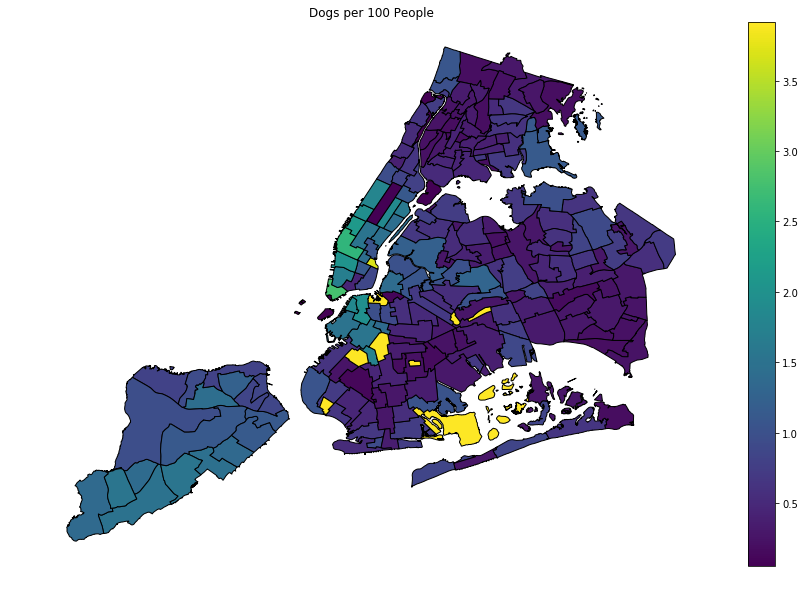

In [185]:
fig, ax = pl.subplots(figsize=(15,10))

mergeddf.plot(ax=ax, column='pupPerCapita', legend=True, edgecolor="black").axis('off')
pl.title('Dogs per 100 People')

pl.show()

Figure 1: this map shows the amount of dogs per 100 people licensed in the City of New york. This is aggregated on the NTA (neighborhood Tabulation Areas)

In [198]:
#Neighborhoods with the most dogs per person
mergeddf.sort(['pupPerCapita'])[-10:][['ntaname', 'pupPerCapita']]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,ntaname,pupPerCapita
63,Brooklyn Heights-Cobble Hill,1.862001
109,Upper East Side-Carnegie Hill,1.877137
107,Lincoln Square,1.954116
121,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,1.960454
175,West Village,2.040439
65,Clinton,2.125371
176,Hudson Yards-Chelsea-Flatiron-Union Square,2.578003
106,Battery Park City-Lower Manhattan,2.769833
119,Stuyvesant Town-Cooper Village,3.693649
188,park-cemetery-etc-Brooklyn,3.913894
